In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
credit = pd.read_csv('C:\\Users\\Dell\\OneDrive - National Economics University\\code\\visualization\\final_data\\data\\dseb63_credit_card_balance.csv')

credit.head(10)

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.000,...,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,87788
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.000,...,16809.210,0.0,0,0.0,0.0,18.0,Active,0,0,87788
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.000,...,27577.890,0.0,0,0.0,0.0,16.0,Active,0,0,87788
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.000,...,65609.235,0.0,0,0.0,0.0,63.0,Active,0,0,87788
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.000,...,70475.850,4.0,4,0.0,0.0,41.0,Active,0,0,87788
5,2582071,-34,0.000,67500,0.0,0.0,0.0,0.0,0.0,63.855,...,0.000,0.0,0,0.0,0.0,60.0,Active,0,0,87788
6,2582071,-54,68278.275,67500,0.0,0.0,0.0,0.0,3375.0,4500.000,...,68278.275,0.0,0,0.0,0.0,46.0,Active,0,0,87788
7,2582071,-55,67630.410,67500,0.0,0.0,0.0,0.0,3375.0,4500.000,...,67630.410,0.0,0,0.0,0.0,45.0,Active,0,0,87788
8,2582071,-58,66873.915,67500,2250.0,2250.0,0.0,0.0,3375.0,9000.000,...,66873.915,1.0,1,0.0,0.0,42.0,Active,0,0,87788
9,2582071,-75,19778.400,67500,0.0,0.0,0.0,0.0,3375.0,9000.000,...,19778.400,0.0,0,0.0,0.0,25.0,Active,0,0,87788


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3227965 entries, 0 to 3227964
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   MONTHS_BALANCE              int64  
 2   AMT_BALANCE                 float64
 3   AMT_CREDIT_LIMIT_ACTUAL     int64  
 4   AMT_DRAWINGS_ATM_CURRENT    float64
 5   AMT_DRAWINGS_CURRENT        float64
 6   AMT_DRAWINGS_OTHER_CURRENT  float64
 7   AMT_DRAWINGS_POS_CURRENT    float64
 8   AMT_INST_MIN_REGULARITY     float64
 9   AMT_PAYMENT_CURRENT         float64
 10  AMT_PAYMENT_TOTAL_CURRENT   float64
 11  AMT_RECEIVABLE_PRINCIPAL    float64
 12  AMT_RECIVABLE               float64
 13  AMT_TOTAL_RECEIVABLE        float64
 14  CNT_DRAWINGS_ATM_CURRENT    float64
 15  CNT_DRAWINGS_CURRENT        int64  
 16  CNT_DRAWINGS_OTHER_CURRENT  float64
 17  CNT_DRAWINGS_POS_CURRENT    float64
 18  CNT_INSTALMENT_MATURE_CUM   float64
 19  NAME_CONTRACT_STATUS 

In [4]:
target = pd.read_csv('C:\\Users\\Dell\\OneDrive - National Economics University\\code\\visualization\\final_data\\data\\target.csv')

target.head()

,SK_ID_CURR,TARGET
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0


### Data Overview

#### Dataset Basic Statistics

In [5]:
print(f'Number of unique SK_ID_PREV in credit_card_balance.csv are: {len(credit.SK_ID_PREV.unique())}')
print(f'Number of unique SK_ID_CURR in credit_card_balance.csv are: {len(credit.SK_ID_CURR.unique())}')

print(f'Number of overlapping SK_ID_CURR in application_train.csv and credit_card_balance.csv are: {len(set(target.SK_ID_CURR.unique()).intersection(set(credit.SK_ID_CURR.unique())))}')

print(f'Number of duplicate values in credit_card_balance: {credit.shape[0] - credit.duplicated().shape[0]}')

Number of unique SK_ID_PREV in credit_card_balance.csv are: 87452
Number of unique SK_ID_CURR in credit_card_balance.csv are: 86905
Number of overlapping SK_ID_CURR in application_train.csv and credit_card_balance.csv are: 69536
Number of duplicate values in credit_card_balance: 0


In [6]:
var_num = len(credit.columns)
observe_num = len(credit)

missing_num = credit.isnull().sum().sum()
missing_per = (missing_num/ (var_num*observe_num)) *100

duplicate_num = credit.duplicated().sum()
duplicate_per = (duplicate_num/ len(credit)) *100

In [7]:
stats = [
        {'Metric': 'Number of variables', 'Value': var_num},
        {'Metric': 'Number of observations', 'Value': observe_num},
        {'Metric': 'Missing cells', 'Value': missing_num},
        {'Metric': 'Missing cells (%)', 'Value': f'{missing_per.sum():.3f}%'},
        {'Metric': 'Duplicate rows', 'Value': duplicate_num},
        {'Metric': 'Duplicate rows (%)', 'Value': f'{duplicate_per:.3f}%'},
    ]

stat = pd.DataFrame(stats)

stat

,Metric,Value
0,Number of variables,23
1,Number of observations,3227965
2,Missing cells,4783385
3,Missing cells (%),6.443%
4,Duplicate rows,0
5,Duplicate rows (%),0.000%


#### Variable Types

In [8]:
numeric = credit.select_dtypes(include = [np.number]).columns.size
categorical = credit.select_dtypes(include = ['object', 'category']).columns.size
datetime = credit.select_dtypes(include = ['datetime64']).columns.size
boolean = credit.select_dtypes(include = ['bool']).columns.size

In [9]:
var = [        
        {'Metric': 'Numeric', 'Value': numeric},
        {'Metric': 'Categorical', 'Value': categorical},
        {'Metric': 'Datetime', 'Value': datetime},
        {'Metric': 'Boolean', 'Value': boolean}
        ]

var_type = pd.DataFrame(var)
var_type

,Metric,Value
0,Numeric,22
1,Categorical,1
2,Datetime,0
3,Boolean,0


### EDA

#### Missing Values

In [31]:
credit_num_cols = credit.select_dtypes(['float', 'int']).columns.tolist()

# Remove unnessary columns
credit_num_cols.remove('SK_ID_CURR')
credit_num_cols.remove('SK_ID_PREV')

cat_cols = credit.select_dtypes(include='object').columns.tolist()

In [11]:
def find_missing(data):
    count_missing = data.isnull().sum().values
    total = data.shape[0]
    ratio_missing = count_missing/total
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing},\
                         index=data.columns.values).query('missing_ratio>0').sort_values(['missing_ratio'], ascending=False)

<Axes: >

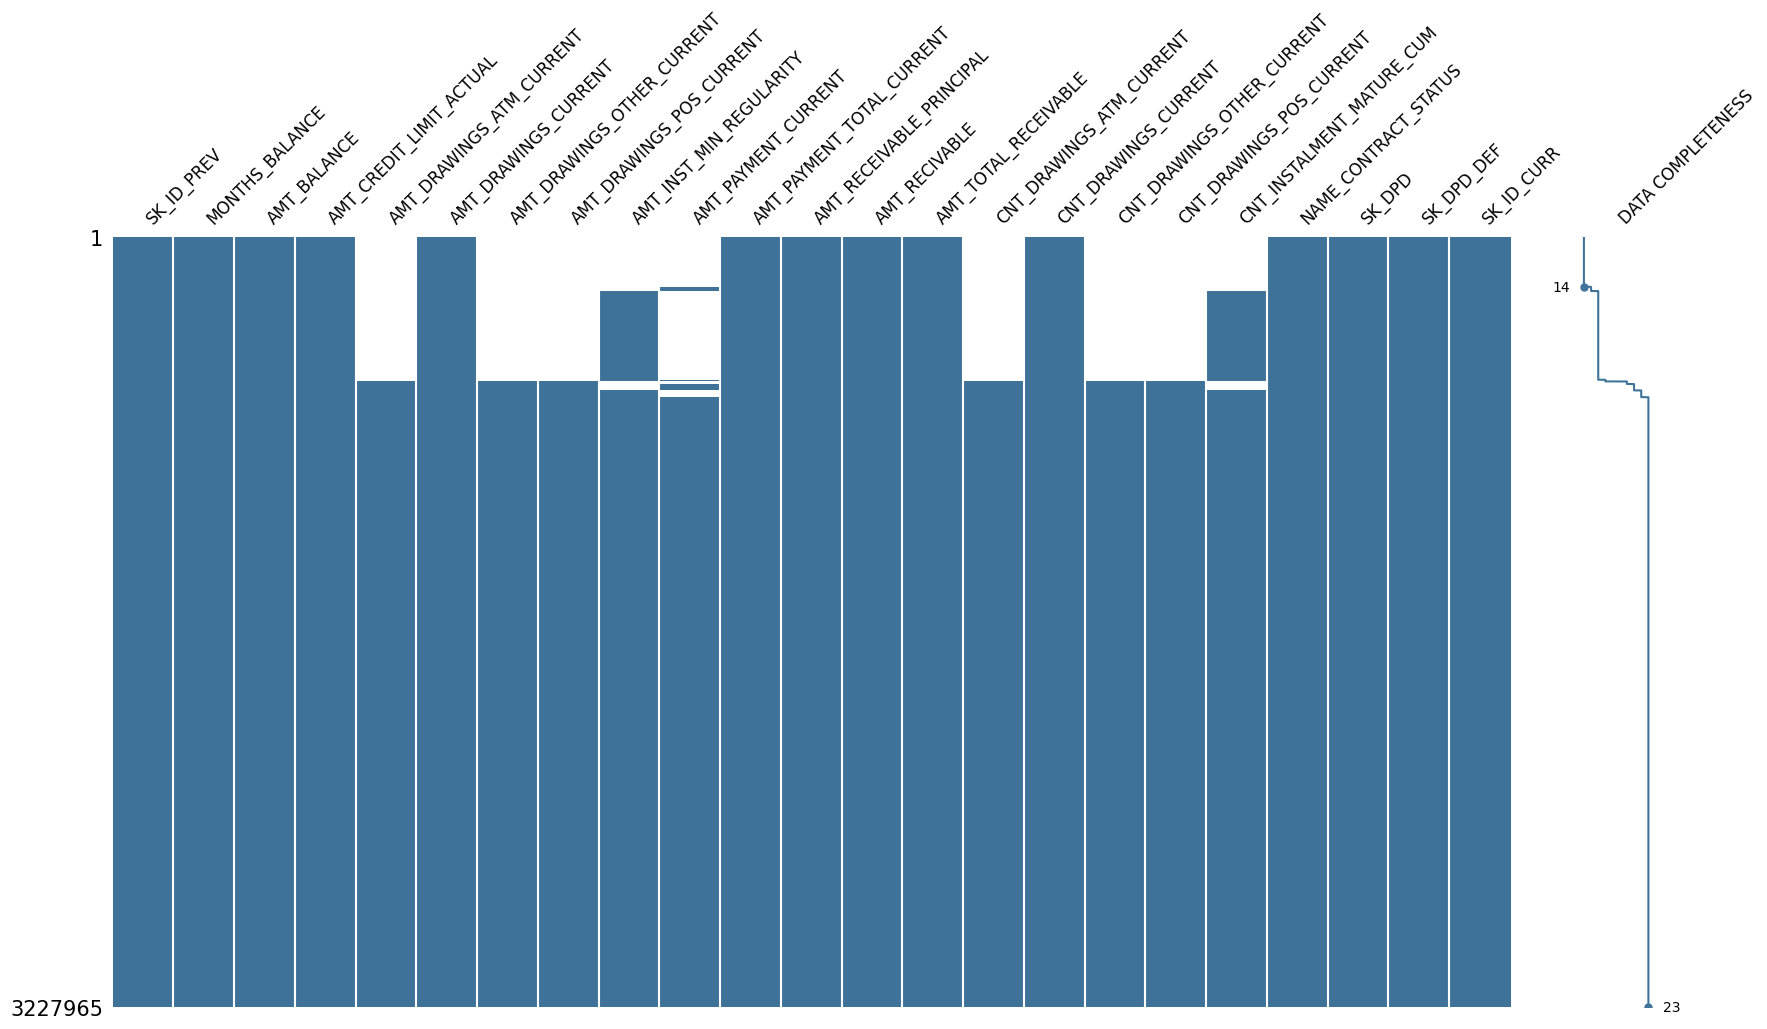

In [16]:
import missingno as msno
msno.matrix(credit, sparkline=True, figsize=(20,10), sort='ascending', fontsize=12, labels=True, color=(0.25, 0.45, 0.6))

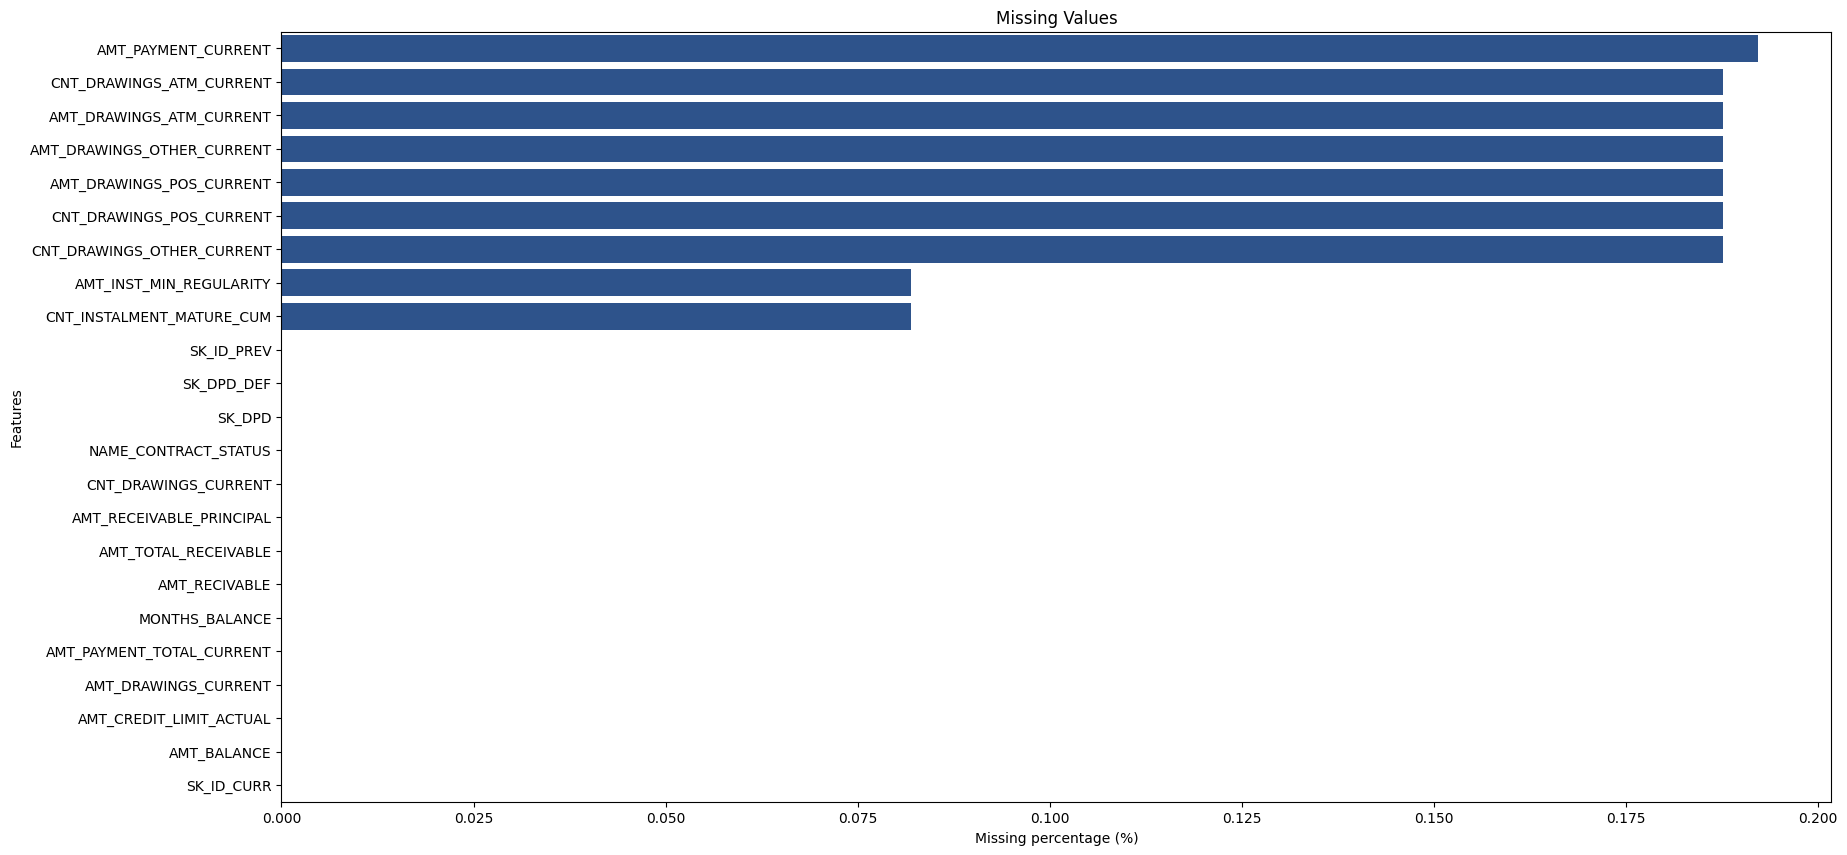

In [20]:
# Barplot of missing values percentage
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=credit.isnull().mean().sort_values(ascending=False), y=credit.isnull().mean().sort_values(ascending=False).index,color='#1f509a', ax=ax)
ax.set_title('Missing Values')

plt.xlabel('Missing percentage (%)')
plt.ylabel('Features')

plt.show()   

In [13]:
find_missing(credit)

,missing_count,missing_ratio
AMT_PAYMENT_CURRENT,620093,0.192100
AMT_DRAWINGS_ATM_CURRENT,605754,0.187658
AMT_DRAWINGS_OTHER_CURRENT,605754,0.187658
AMT_DRAWINGS_POS_CURRENT,605754,0.187658
CNT_DRAWINGS_ATM_CURRENT,605754,0.187658
CNT_DRAWINGS_OTHER_CURRENT,605754,0.187658
CNT_DRAWINGS_POS_CURRENT,605754,0.187658
AMT_INST_MIN_REGULARITY,264384,0.081904
CNT_INSTALMENT_MATURE_CUM,264384,0.081904


#### Outliers

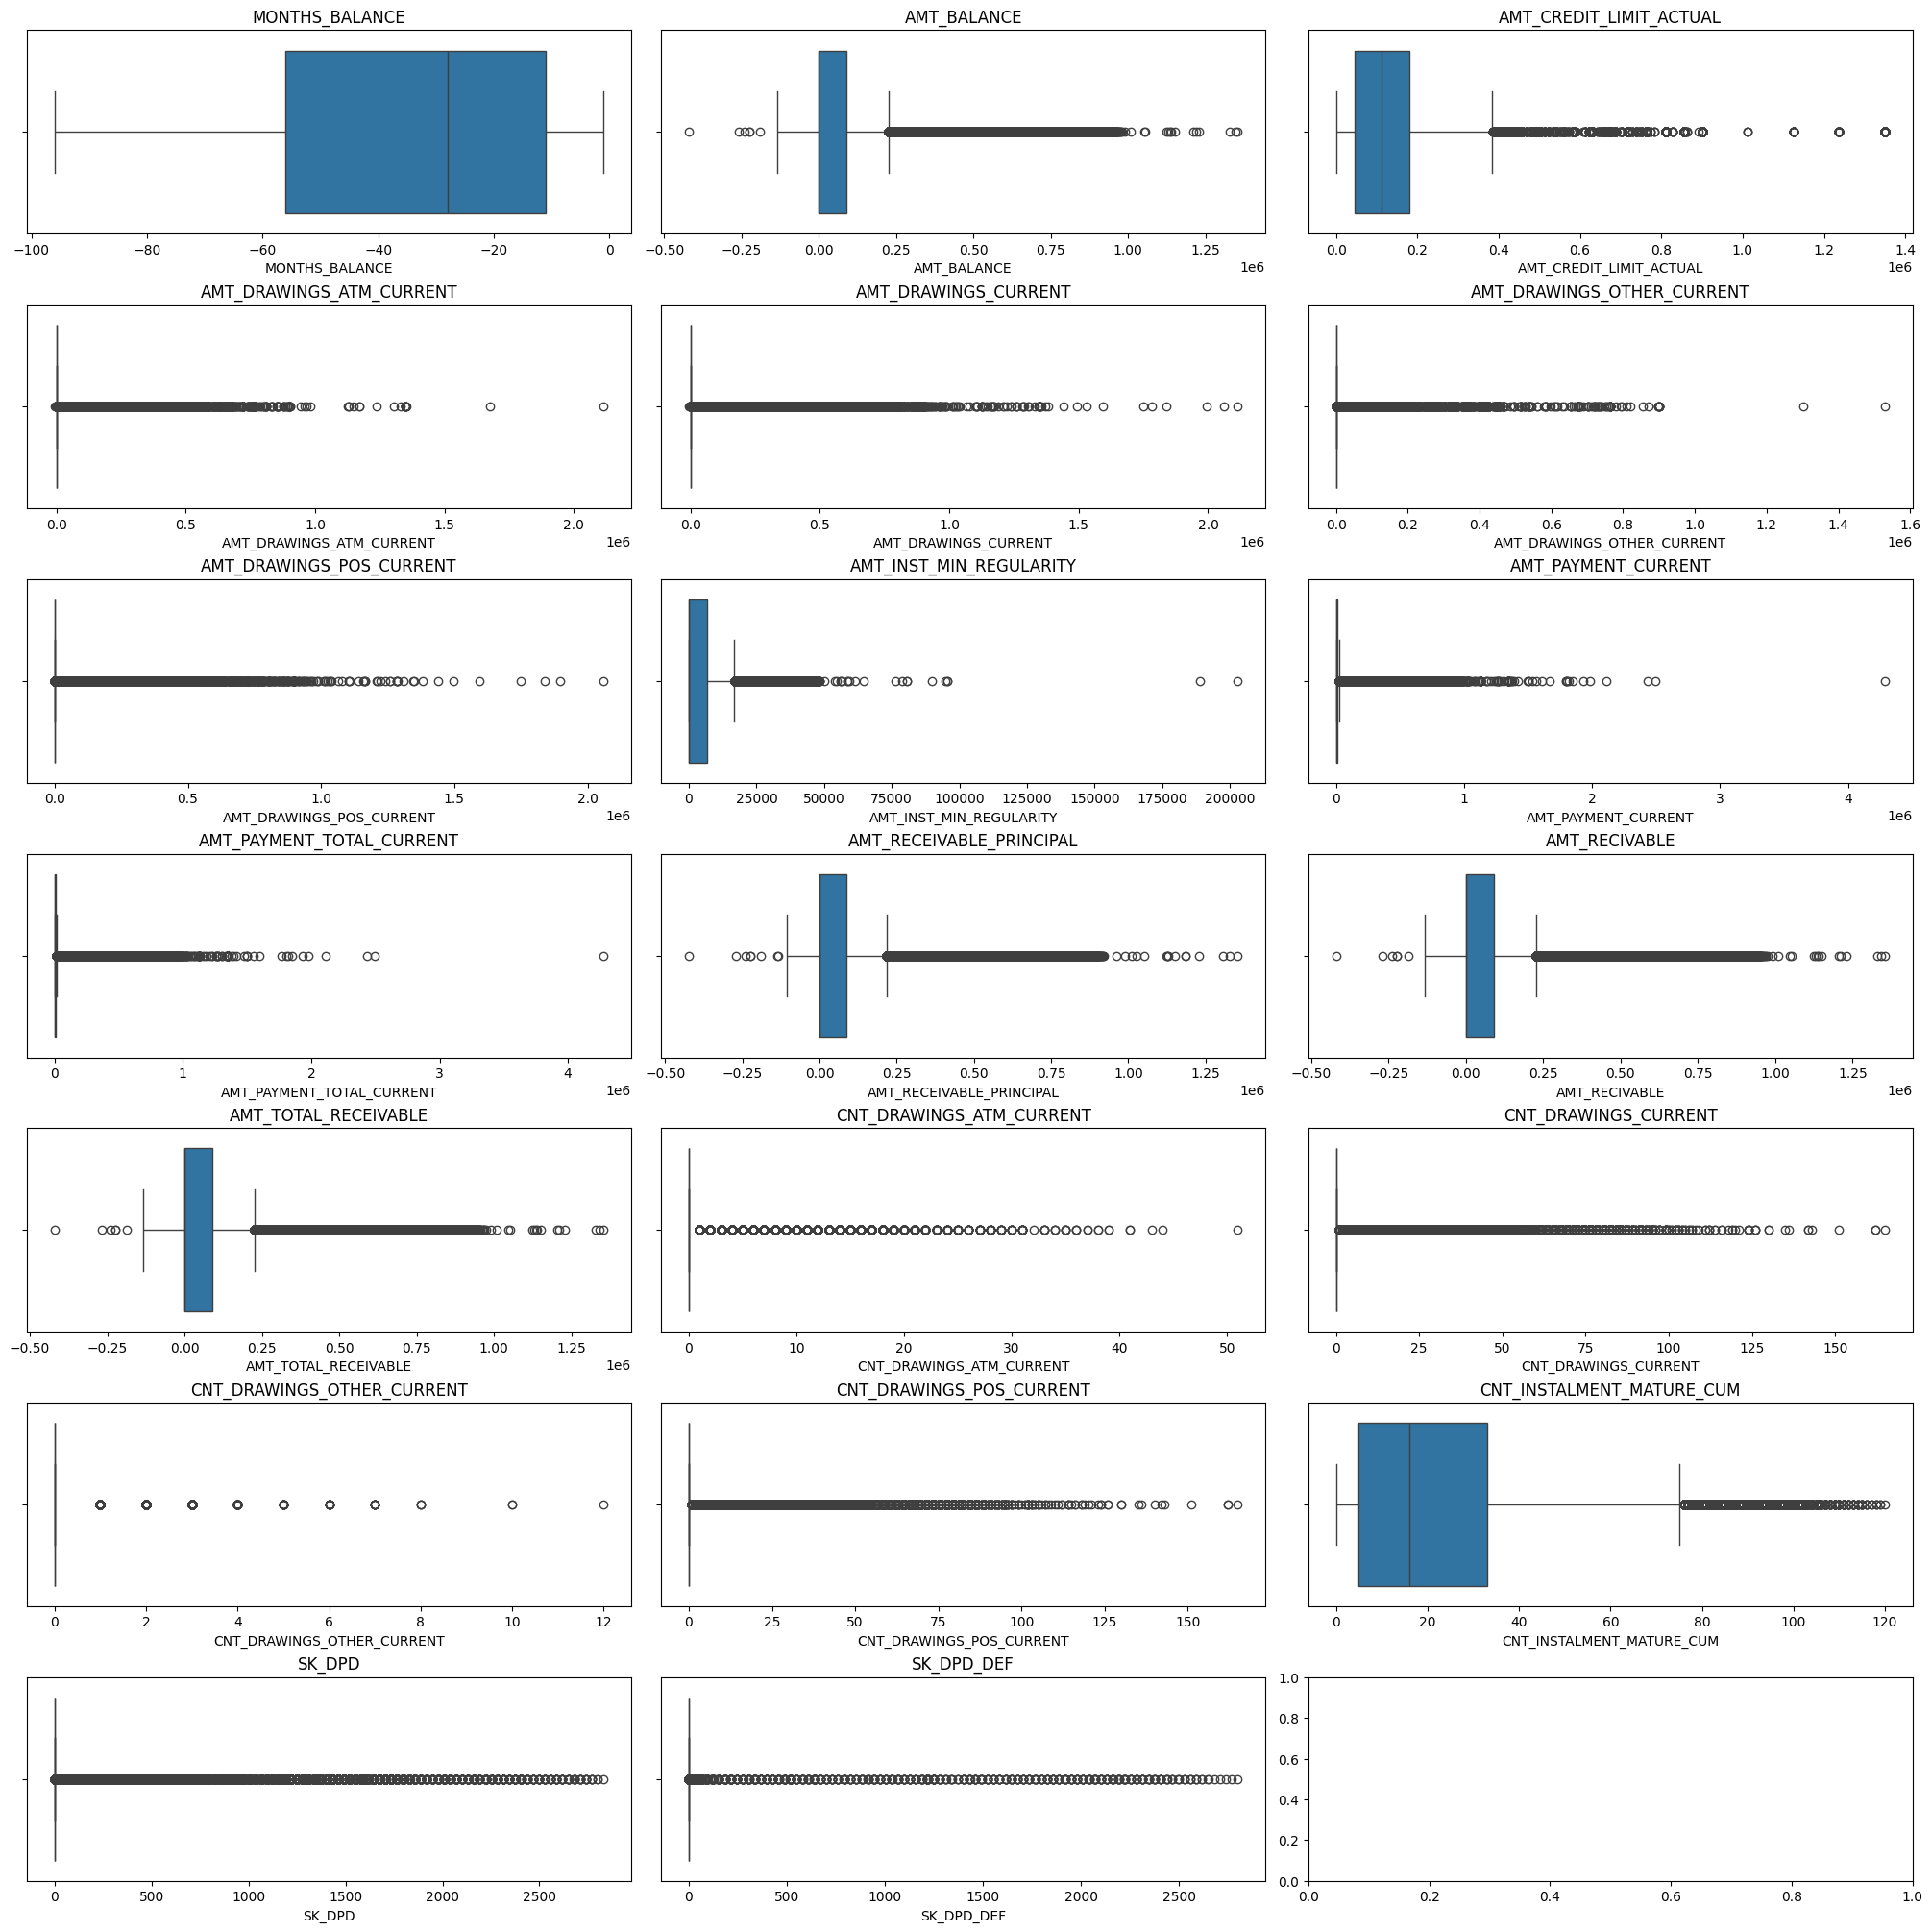

In [14]:
# Boxplot of numerical columns
ncol, nrow = 3, len(credit_num_cols)//3 + 1
fig, axes = plt.subplots(nrow, ncol, figsize=(20, len(credit_num_cols)), constrained_layout=True)

for ax, column in zip(axes.flatten(), credit_num_cols):
    sns.boxplot(x=credit[column], ax=ax)
    ax.set_title(column)

plt.show()

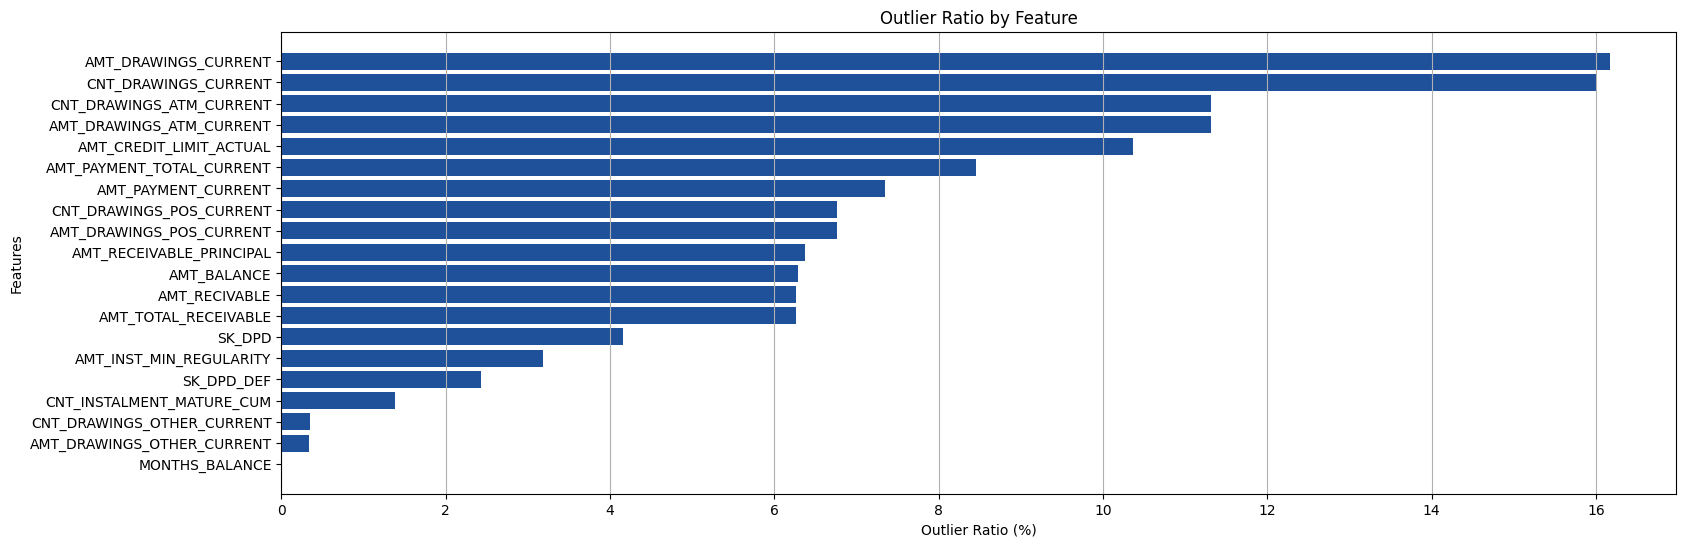

In [19]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


def outlier_ratio(df, column):
        outliers = find_outliers(df, column)
        ratio = len(outliers) / len(df) * 100
        return ratio

# Check outlier ratio for each feature
outlier_ratios = {}
for col in credit_num_cols:
    outlier_ratios[col] = outlier_ratio(credit, col)

# Convert the outlier ratios to a DataFrame
outlier_ratios_df = pd.DataFrame(outlier_ratios.items(), columns=['Feature', 'Outlier Ratio (%)'])
outlier_ratios_df = outlier_ratios_df.sort_values(by='Outlier Ratio (%)', ascending=True)

# Plotting the outlier ratios
plt.figure(figsize=(18, 6))
plt.barh(outlier_ratios_df['Feature'], outlier_ratios_df['Outlier Ratio (%)'], color='#1f509a')
plt.title('Outlier Ratio by Feature')
plt.xlabel('Outlier Ratio (%)')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()

#### Discriptive

In [21]:
# Validity check
credit.describe()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,SK_ID_CURR
count,3.227965e+06,3.227965e+06,3.227965e+06,3.227965e+06,2.622211e+06,3.227965e+06,2.622211e+06,2.622211e+06,2.963581e+06,2.607872e+06,...,3.227965e+06,3.227965e+06,2.622211e+06,3.227965e+06,2.622211e+06,2.622211e+06,2.963581e+06,3.227965e+06,3.227965e+06,3.227965e+06
mean,1.903894e+06,-3.471544e+01,5.907332e+04,1.529536e+05,6.024272e+03,7.494084e+03,2.984882e+02,2.884152e+03,3.599681e+03,1.023861e+04,...,5.886264e+04,5.887259e+04,3.150212e-01,7.011439e-01,4.988538e-03,5.431047e-01,2.108883e+01,9.494803e+00,2.857060e-01,1.536542e+05
std,5.367415e+05,2.663609e+01,1.066137e+05,1.637092e+05,2.842116e+04,3.396743e+04,8.396193e+03,2.038833e+04,5.611742e+03,3.586433e+04,...,1.062747e+05,1.062813e+05,1.112726e+00,3.171833e+00,8.408493e-02,3.193040e+00,1.998730e+01,9.805148e+01,1.957034e+01,8.857121e+04
min,1.000018e+06,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.431613e+06,-5.600000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.557000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,7.690500e+04
50%,1.896076e+06,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.923020e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,1.532070e+05
75%,2.369259e+06,-1.100000e+01,9.040554e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.750000e+03,9.000000e+03,...,9.020840e+04,9.022635e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.300000e+01,0.000000e+00,0.000000e+00,2.300480e+05
max,2.843493e+06,-1.000000e+00,1.354829e+06,1.350000e+06,2.115000e+06,2.115000e+06,1.529847e+06,2.060030e+06,2.028820e+05,4.289207e+06,...,1.354829e+06,1.354829e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,2.831000e+03,2.800000e+03,3.075090e+05


Abruptly large value
- AMT_PAYMENT_CURRENT = 4289207.4
- AMT_PAYMENT_TOTAL_CURRENT = 4278315.7  
-> Replace with NULL or drop

In [ ]:
# Distribution of categorical variable
def plot_categorical_variables_bar(data, column_name, figsize = (18,6), rotation = 0, horizontal_adjust = 0, fontsize_percent = 'xx-small'): 
    print(f"Total Number of unique categories of {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    #plotting overall distribution of category
    data_to_plot = data[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')
    
    total_datapoints = len(data[column_name].dropna())
    for p in ax.patches:
        ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution of {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Counts')


Total Number of unique categories of NAME_CONTRACT_STATUS = 7


C:\Users\Dell\AppData\Local\Temp\ipykernel_26384\2183461263.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')


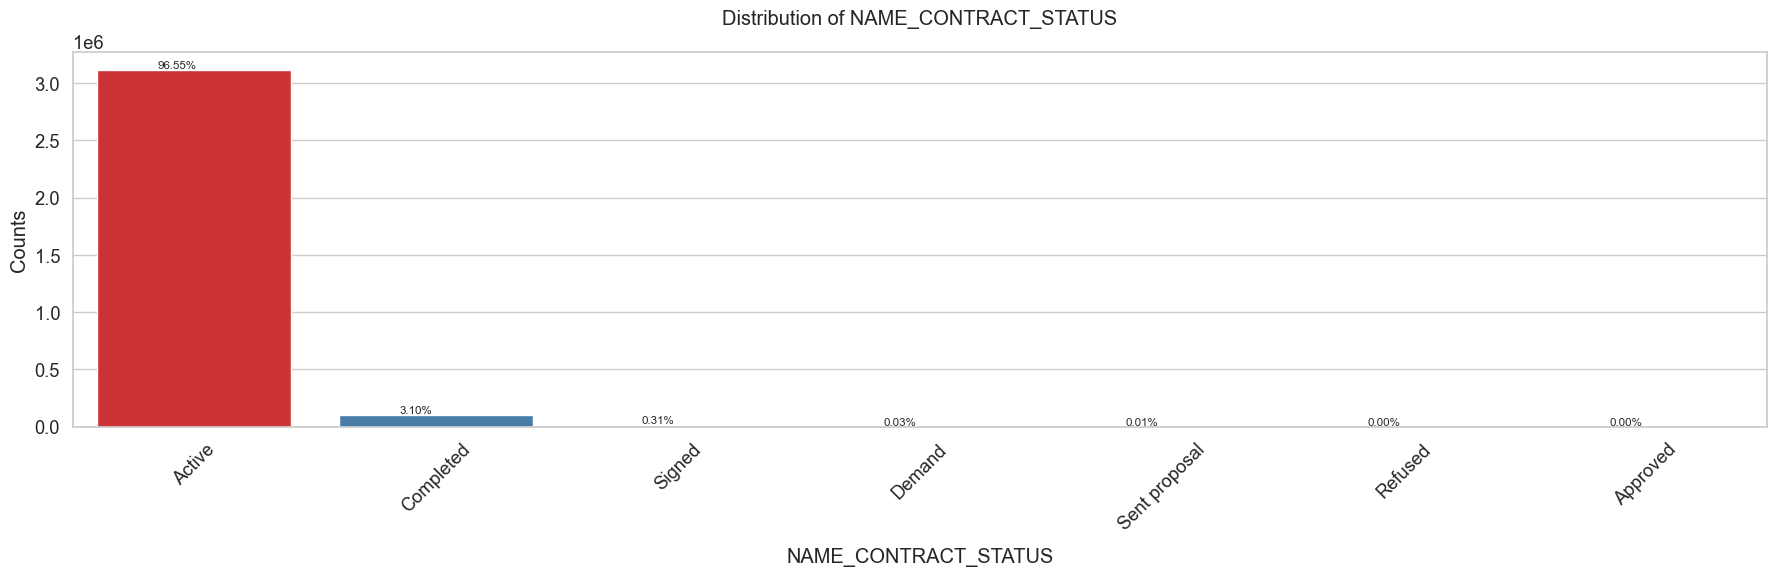

In [27]:
plot_categorical_variables_bar(credit, column_name='NAME_CONTRACT_STATUS', rotation = 45, horizontal_adjust = 0.25)

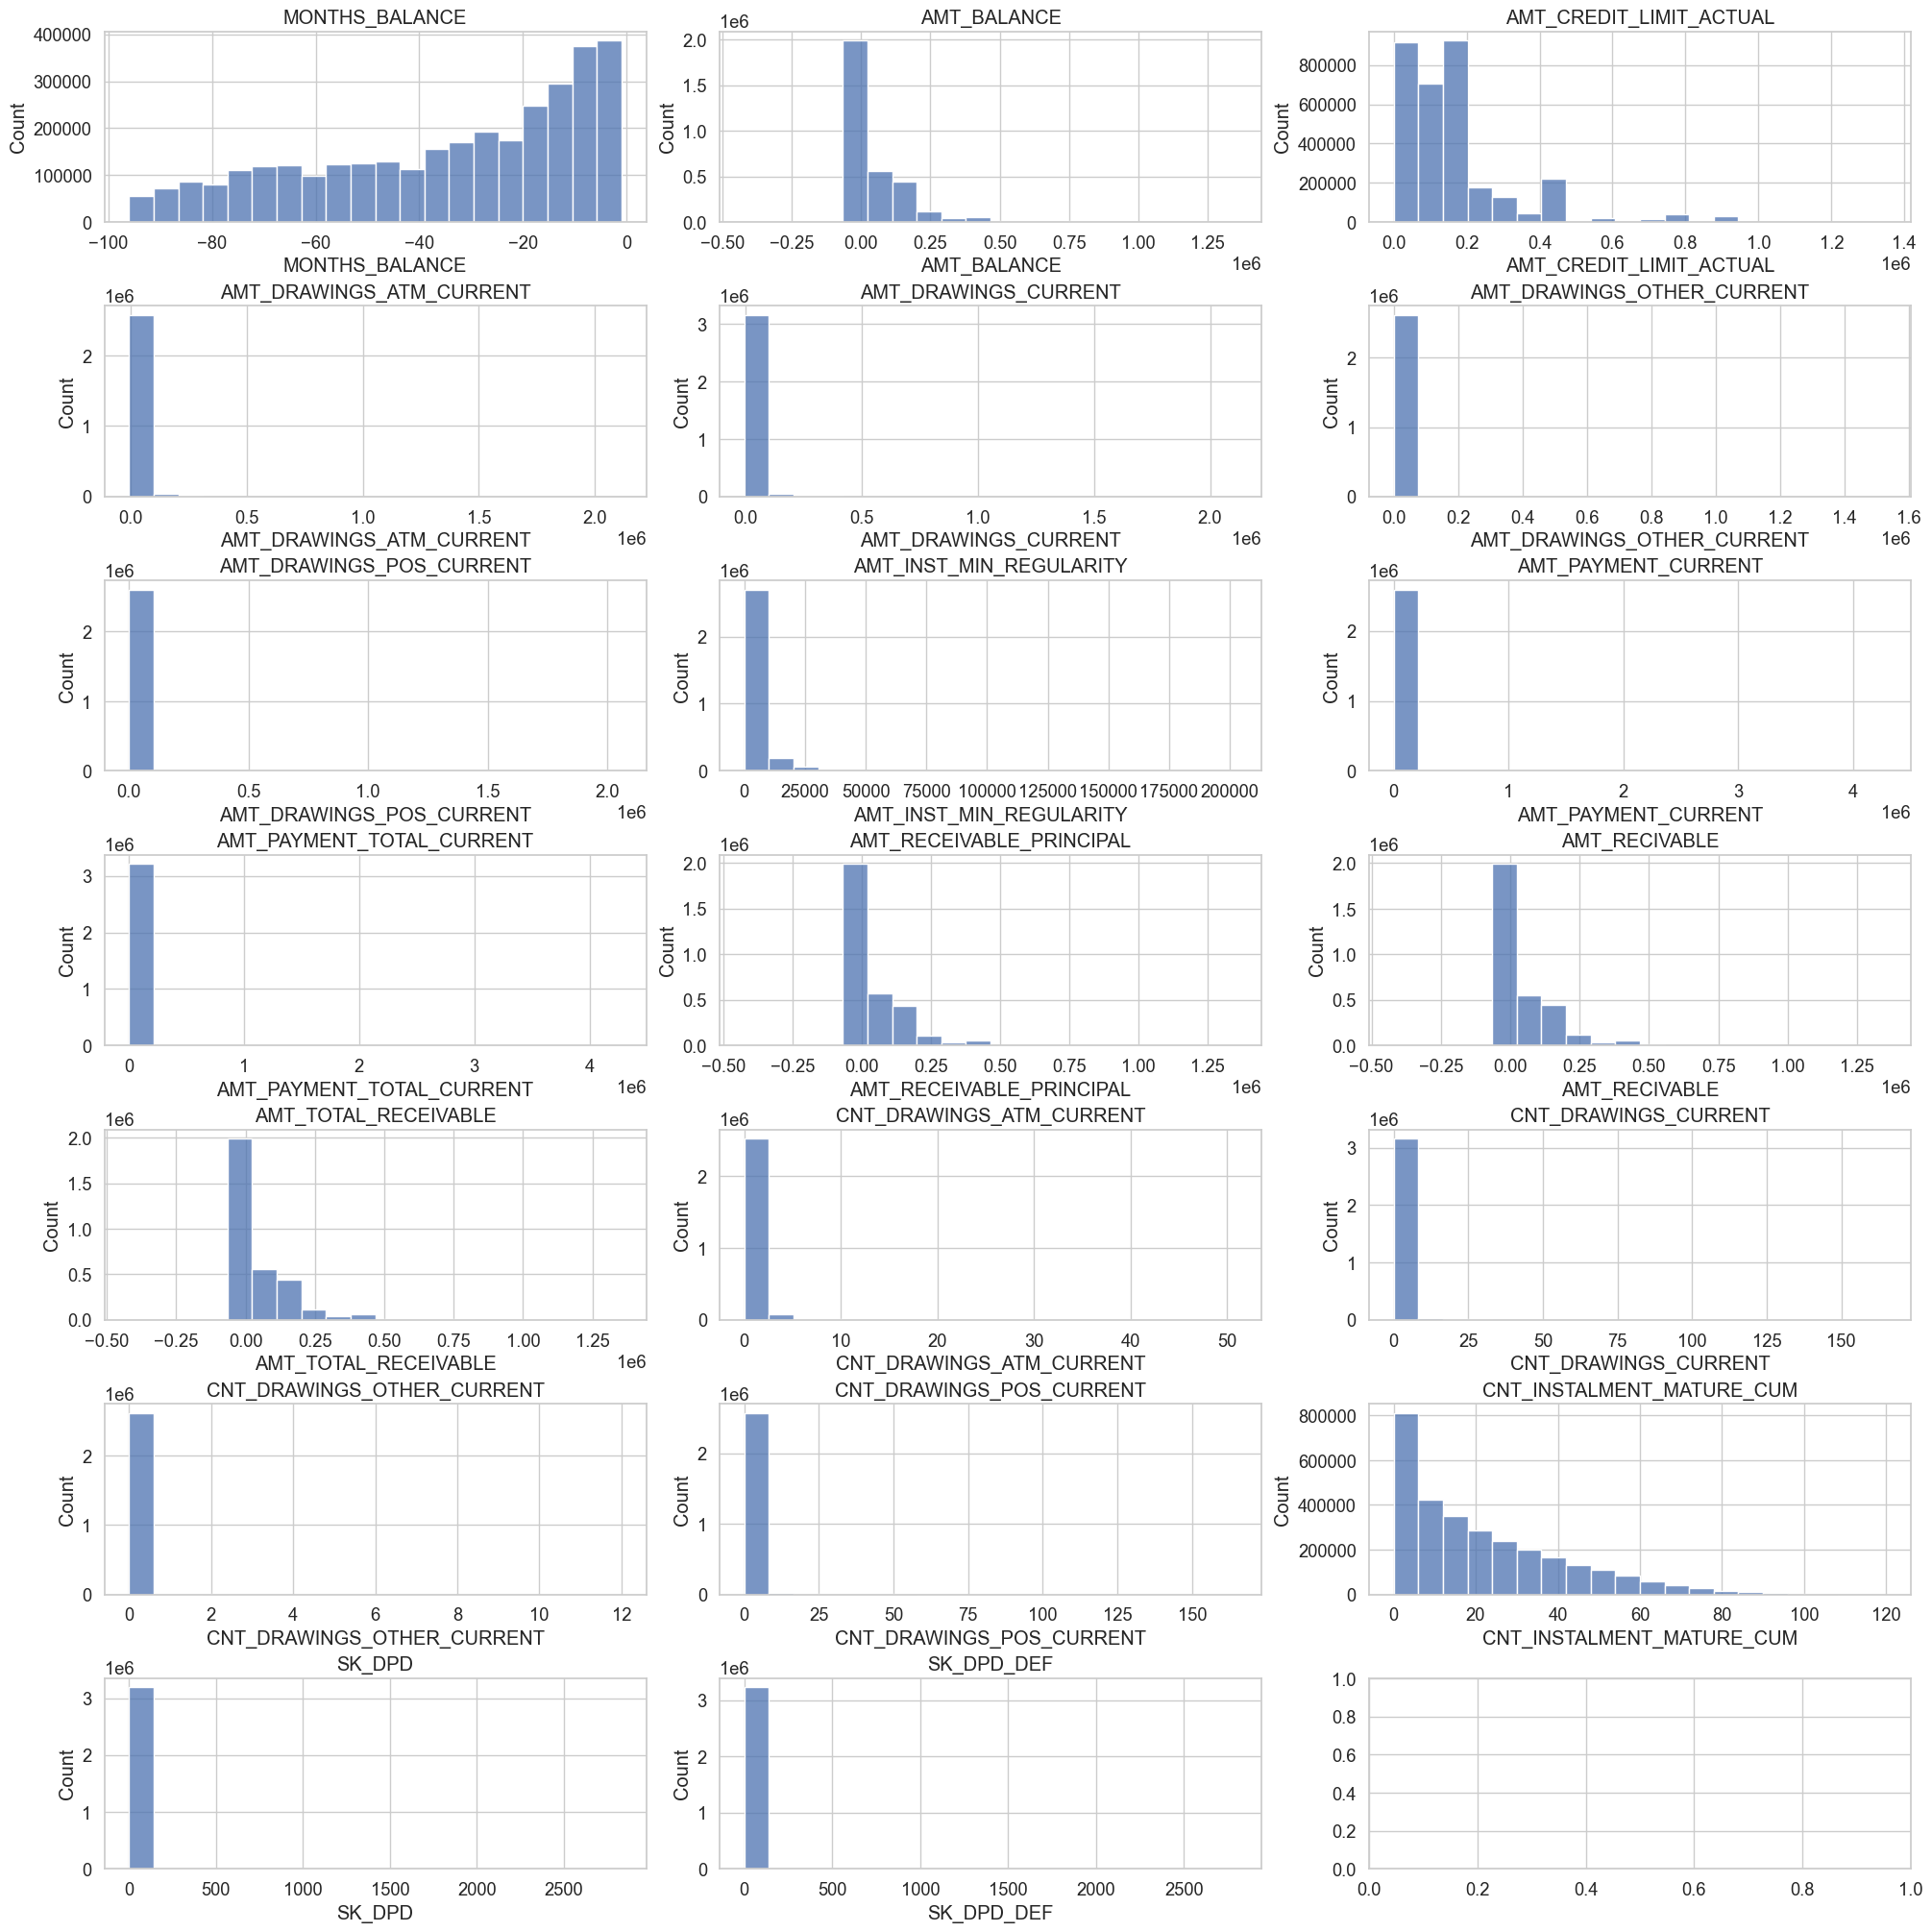

In [ ]:
# Plot histogram of numerical columns
cols_to_plot = [col for col in credit_num_cols]
ncol, nrow = 3, len(cols_to_plot)//3 + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(20, len(cols_to_plot)), constrained_layout=True)

for ax, column in zip(axes.flatten(), cols_to_plot):
    sns.histplot(x=credit[column], ax=ax, bins=20)
    ax.set_title(column)

plt.show()

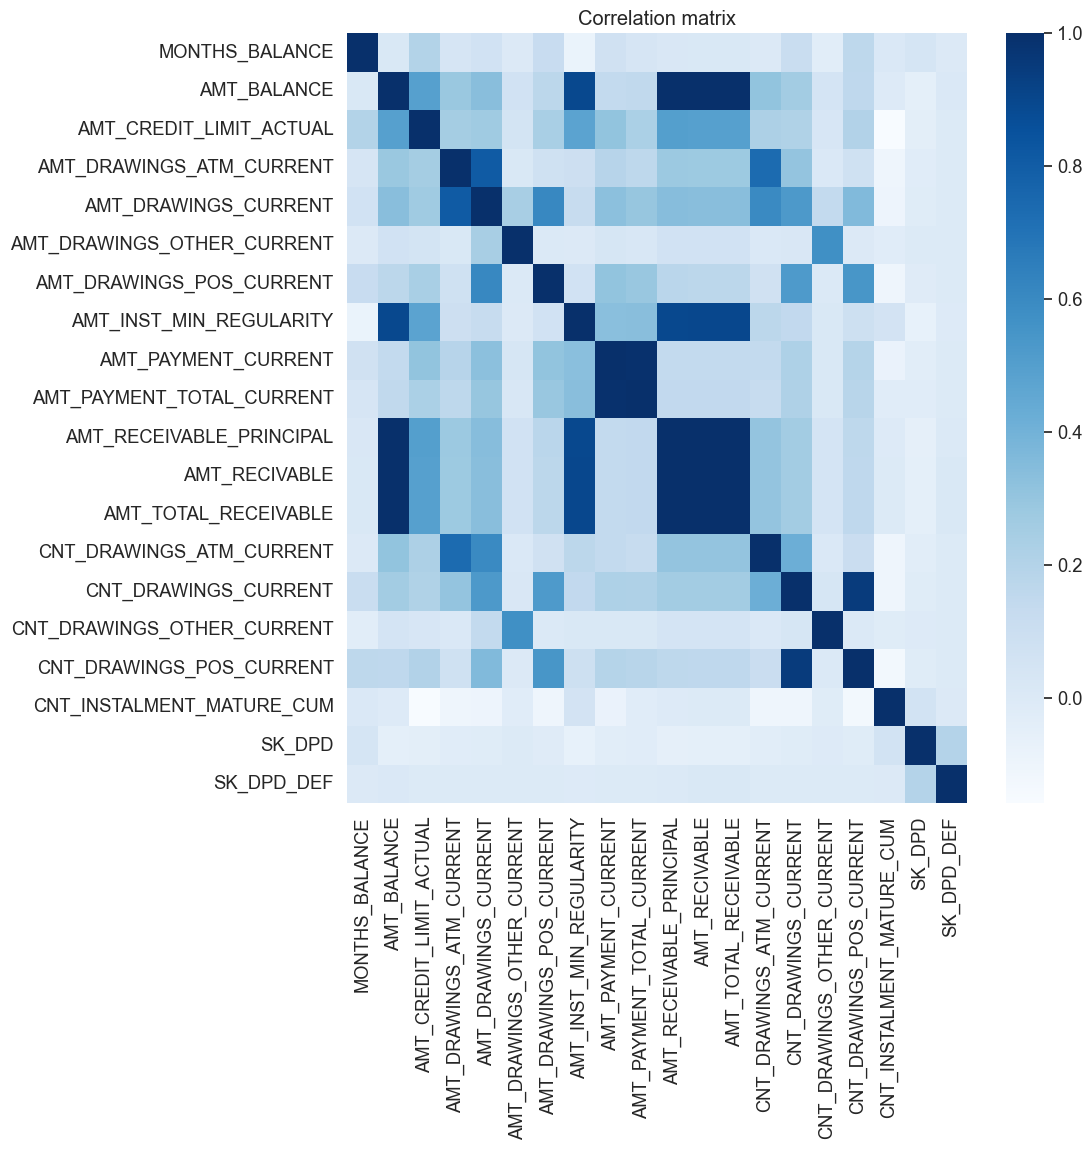

In [39]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(credit[credit_num_cols].corr(), ax=ax, cmap=sns.color_palette("Blues", as_cmap=True))
ax.set_title('Correlation matrix')
plt.show()

#### Merge with Target

In [35]:
credit_merge = credit.merge(target, on='SK_ID_CURR', how='left')

# drop rows that have null TARGET for easier EDA
credit_merge= credit_merge[~credit_merge['TARGET'].isnull()]

credit_merge

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR,TARGET
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,1.0,1,0.0,0.0,69.0,Active,0,0,87788,1.0
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,0.0,0,0.0,0.0,18.0,Active,0,0,87788,1.0
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,0.0,0,0.0,0.0,16.0,Active,0,0,87788,1.0
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,0.0,0,0.0,0.0,63.0,Active,0,0,87788,1.0
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,4.0,4,0.0,0.0,41.0,Active,0,0,87788,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227960,1551072,-1,0.000,202500,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,0,NaN,NaN,0.0,Active,0,0,259579,0.0
3227961,2339982,-1,0.000,45000,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0,0.0,0.0,0.0,Active,0,0,220697,0.0
3227962,2720102,-1,0.000,225000,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,0,NaN,NaN,0.0,Active,0,0,93573,0.0
3227963,1897864,-2,0.000,270000,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,0,NaN,NaN,0.0,Active,0,0,11072,0.0


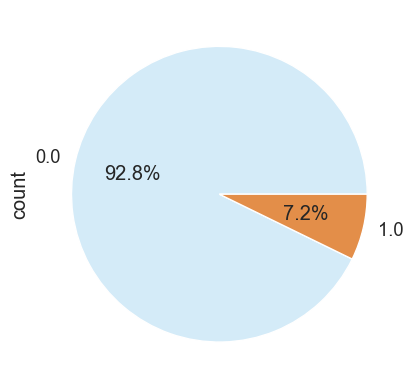

In [36]:
credit_merge['TARGET'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#d4ebf8', '#e38e49'])
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_26384\2587818455.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category, palette = 'Set2')


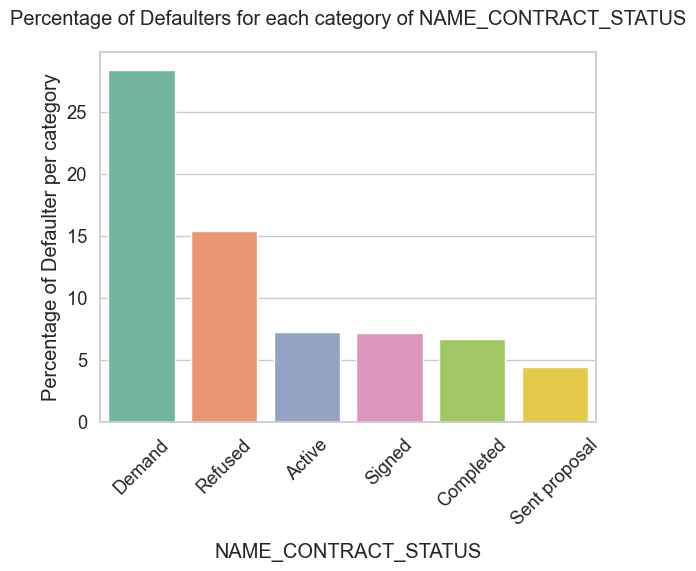

In [37]:
#plotting distribution of category for Defaulters
percentage_defaulter_per_category = (credit_merge['NAME_CONTRACT_STATUS'][credit_merge.TARGET == 1].value_counts() * 100 / credit_merge['NAME_CONTRACT_STATUS'].value_counts()).dropna().sort_values(ascending = False)

sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category, palette = 'Set2')
plt.ylabel('Percentage of Defaulter per category')
plt.xlabel('NAME_CONTRACT_STATUS', labelpad = 10)
plt.xticks(rotation = 45)
plt.title(f'Percentage of Defaulters for each category of NAME_CONTRACT_STATUS', pad = 20)
plt.show()

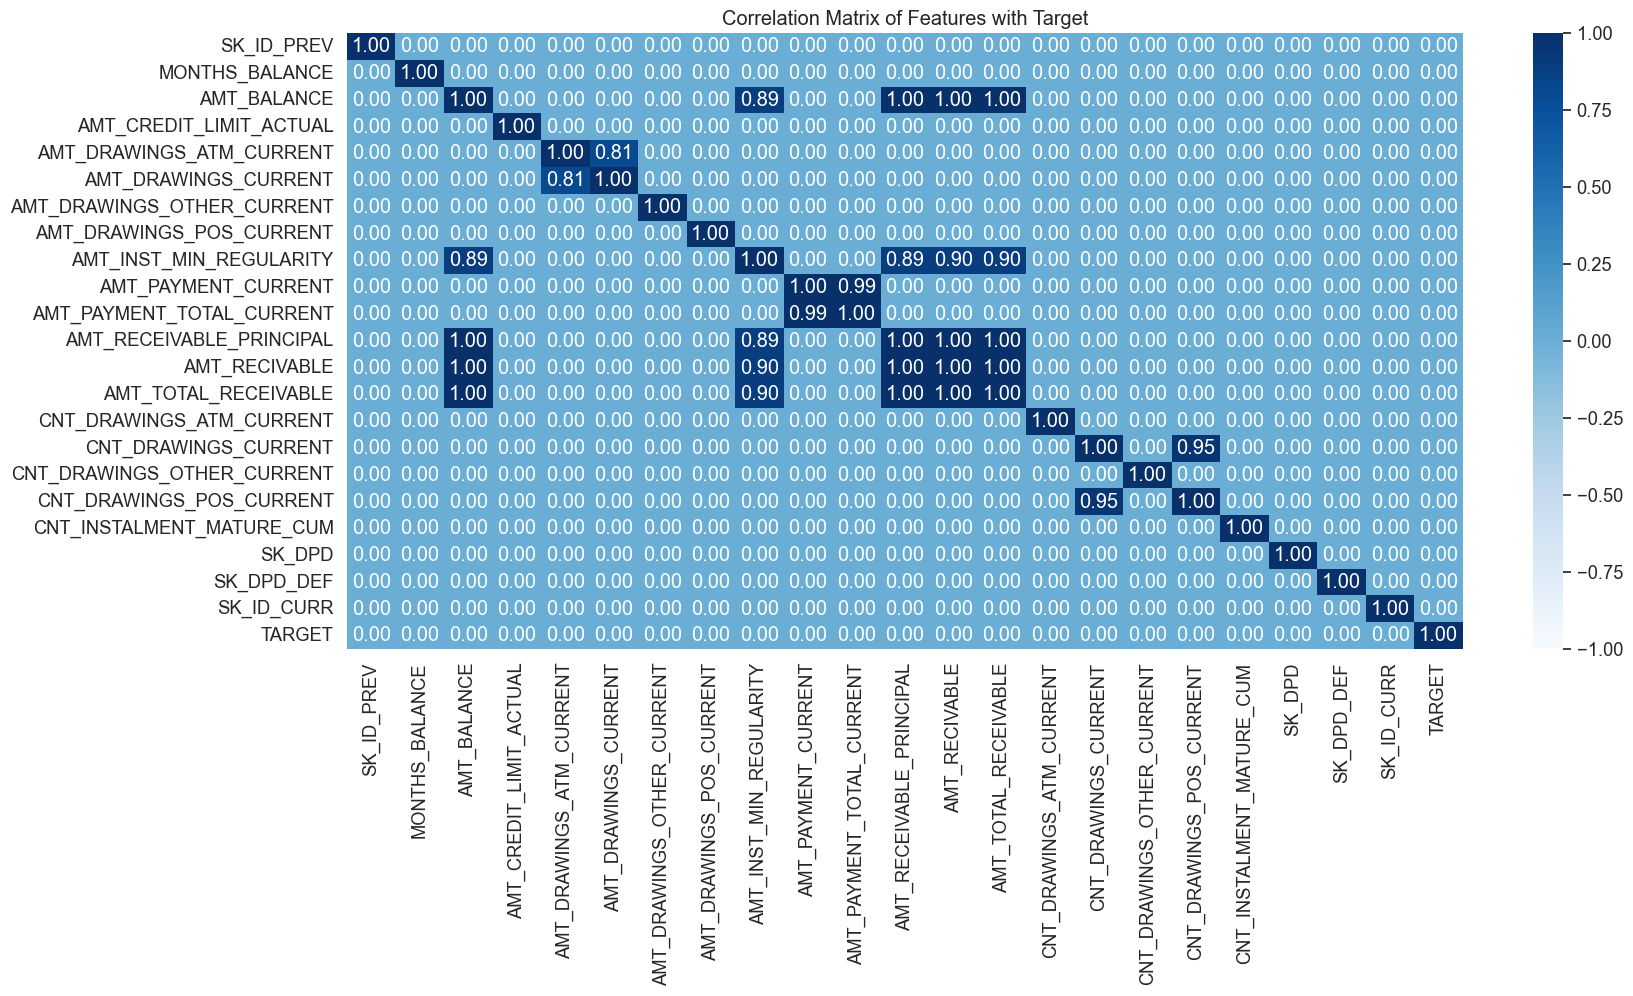

In [43]:
cols_to_use = credit_merge.select_dtypes(include=np.number).columns.tolist()
corr_matrix = credit_merge[cols_to_use].corr()

# Set corr < 0.8 = 0
corr_matrix[abs(corr_matrix) < 0.8] = 0

plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, 
            annot=True,
            cmap=sns.color_palette("Blues", as_cmap=True),
            fmt='.2f',
            vmin=-1,  # Set range = [-1, 1]
            vmax=1)   
plt.title('Correlation Matrix of Features with Target')
plt.show()

From the heatmap of correlation matrix, we see a few couples of highly correlated features. 
- AMT_RECEIVABLE_PRINCIPLE, AMT_RECIVABLE, AMT_TOTAL_RECEIVABLE and AMT_BALANCE  
- We also observe high correlation between these 3 AMT_RECEIVABLE columns
AMT_PAYMENT_TOTAL_CURRENT and AMT_PAYMENT_CURRENT
- The correlation of features with Target isn't noticeable, this shows the absence of a linear relationship between the feature and the target variable.

In [45]:
#group by the 'SK_ID_PREV' field and aggregate with mean -> get an averaged row for each of the previous loan that the client had.
copy = credit_merge.groupby('SK_ID_PREV')[cols_to_use].mean()

In [46]:
def plot_continuous_variables(data, column_name,   figsize = (20,8), histogram = True, log_scale = False):
    data_to_plot = data.copy()
    sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
    plt.title("Box-Plot of {}".format(column_name))
    if log_scale:
        plt.yscale('log')
        plt.ylabel(f'{column_name} (log Scale)')

    plt.show()

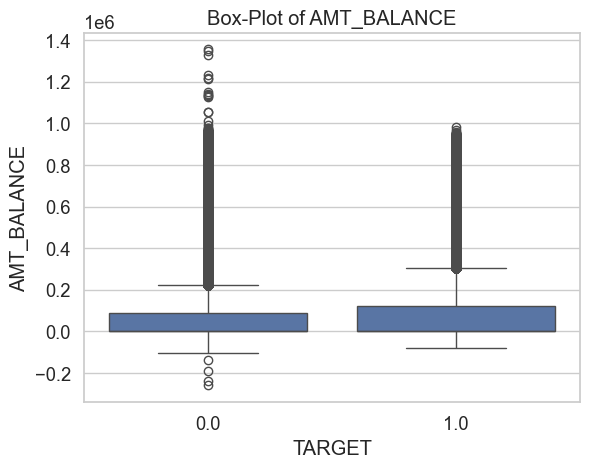

In [47]:
plot_continuous_variables(credit_merge, 'AMT_BALANCE', figsize = (8,8))

- From the above plot, Defaulters have a higher value of AMT_BALANCE as compared to Non-Defaulters. They show a higher values of all the quantiles  
-> This could imply that the Credit amount for Defaulters could also be relatively higher as compared to Non-Defaulters.

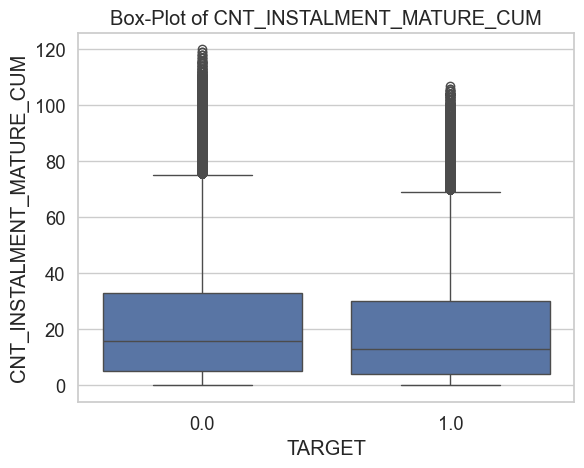

In [48]:
plot_continuous_variables(credit_merge, 'CNT_INSTALMENT_MATURE_CUM', figsize = (8,8))

- This plot shows that the Non-Defaulters usually had higher range of values for the number of installments paid as compared to Defaulters  
-> This might show the defaulting behaviour, where in the defaulters usually would pay fewer number of installments on their previous credit.

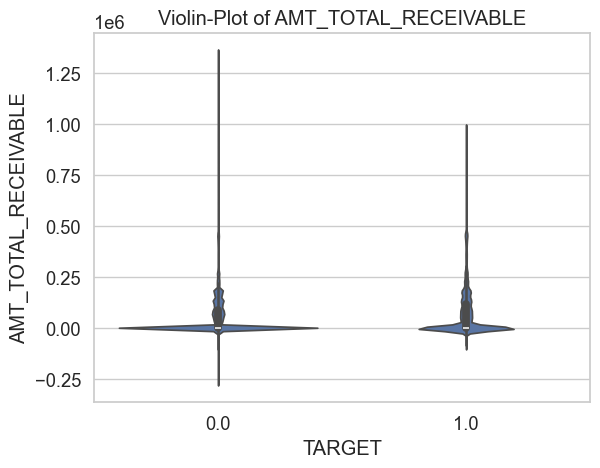

In [49]:
def plot_violin(data, column_name, figsize = (20,8), histogram = True):
    data_to_plot = data.copy()
    sns.violinplot(x='TARGET', y=column_name, data=data_to_plot)
    plt.title("Violin-Plot of {}".format(column_name))

    plt.show()
    
plot_violin(credit_merge, 'AMT_TOTAL_RECEIVABLE', figsize = (8,8))

- Looking at the violin plot of AMT_TOTAL_RECEIVABLE, we see a similar behavious as seen with other amounts as well, which is that the Defaulters usually had higher Amount Receivable on their previous credit